<img src="Bilder/ost_logo.png" width="240" height="240" align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> FS 2021 <br> <a href="mailto:klaus.frick@ost.ch"> Klaus Frick </a> und <a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# Lektion 2

Nach den ersten Gehversuchen mit Python und Pandas in Lektion 1, befassen wir uns in dieser Lektion wesentlich konkreter mit den Daten. Die **explorative Datenanalyse** ist stets der erste Schritt in einem erfolgreichen Machine Learning Projekt und hat das Ziel mit dem Daten vertraut zu werden. 

Wir studieren in diesem Notebook wiederum den *Titanic*-Datensatz. Sie können dieses Notebook parallel zur Vorlesung geöffnet halten und parallel zum Unterricht die einzelnen Schritte live nachverfolgen. 

## Einlesen der Daten und erste Betrachtungen

Wie wir beriets am Schaubild der *Data Science Hierachy of Needs* gesehen haben, gehen wir in diesem Kurs immer davon aus, dass die Daten bereits **tidy** sind. Wer sich genauer mit diesen Konzept auseinandersetzen möchte, dem sei der Artikel

H. Wickham *Tidy Data*, Journal of Statistical Software **59**(10), 2014

empfohlen (auf Moodle). Bei uns werden die Daten daher stets in Form von .csv Datein vorliegen, die mehr oder weniger immer in der gewünschten Form strukturiert sind. Der *Titanic*-Datensatz macht da keine Ausnahme. 

In [1]:
import numpy as np
import pandas as pd

titanic_data = pd.read_csv("Data/train.csv") 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Wie bereits in Kapitel 1 diskutiert, ist es zunächst wichtig die groben *Metadaten* des Datensatzes abzuleiten, um die wichtigsten Fragen der EDA zu beantworten. Typischerweise betrifft dies zunächst die Struktur und die Granularität der Daten. Es handelt sich augenscheinlich um *tidy data*: Die Merkmale sind in den Spalten und die Beobachtungen in den Zeilen. Die Spalte `Name` ist im engsten Sinne kein Merkmal, sondern ein Index. Wir können dies berücksichtigen, indem wir den kanonischen Index durch den Namen des Passagiers ersetzen. 

In [2]:
titanic_data = titanic_data.set_index("Name") 
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Nun betrachten wir die Grösse der Daten.

In [3]:
titanic_data.shape

(891, 11)

Es sind also 891 stat. Einheiten (Personen) im Datensatz erfasst, wobei 11 Merkmale pro Person aufgelistet sind
- `PassengerId` (Integer). Eindeutige ID des Passagiers
- `Survived` (Boolena). Indikatorvariable, ob der Passagier gerettet wurde oder nicht. Kodiert mit 0/1 (0 … nicht gerettet, 1 … gerettet)
- `Pclass` (Qualitativ, ordinal). Passagierklasse (1-3). 
- `Sex` (Qualitativ, nominal). Geschlecht des Passagierts (male/female)
- `Age` (Quantitativ, diskret). Alter des Passagiers in Jahren (Integer).
- `SibSp` (Quantitativ, diskret). Anzahl der Geschwister/Ehepartner an Bord (Integer).
- `Parch` (Quantitativ, diskret). Anzahl der Elternteile/Kinder an Bord (Integer). 
- `Ticket` (Qualitativ, nominal). Ticketnummer
- `Fare` (Quantitativ, stetig). Ticketpreis in Pfund, die der Passagier für die Überfahrt bezahlt hat (reelle Zahl). 
- `Cabin` (Qualitativ, nominal). Kabinennummer
- `Embarked` (Qualitativ, nominal). Einstiegshafen (S ... Southhampton, C ... Cherbourg, Q ... Queenstown)

Die Merkmale `PassengerId` sowie `Ticket` scheinen zunächst uninteressant zu sein und wir entfernen sie aus dem Datensatz. Dazu verwenden wir den Befehl `drop`.

In [4]:
dropping = ['PassengerId', 'Ticket']
titanic_data.drop(dropping, axis=1, inplace=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Name,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0,1,0,71.2833,C85,C
"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,53.1000,C123,S
"Allen, Mr. William Henry",0,3,male,35.0,0,0,8.0500,NaN,S


Jetzt sieht der Datensatz sehr brauchbar aus. Das Merkmal `Cabin` scheint fehlende Werte zu besitzen, was durch das Symbol `NaN` (**N**ot **a** **N**umber) gekennzeichnet ist. 

Durch das setzen der Indizes auf die Namen der Passagiere hat man scheinbar eine Funktionalität verloren: die Möglichkeit der Auswahl der Zeilen mittels Zeilenanzahl:

In [5]:
titanic_data['Survived']

Name
Braund, Mr. Owen Harris                                      0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)          1
Heikkinen, Miss. Laina                                       1
Futrelle, Mrs. Jacques Heath (Lily May Peel)                 1
Allen, Mr. William Henry                                     0
Moran, Mr. James                                             0
McCarthy, Mr. Timothy J                                      0
Palsson, Master. Gosta Leonard                               0
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)            1
Nasser, Mrs. Nicholas (Adele Achem)                          1
Sandstrom, Miss. Marguerite Rut                              1
Bonnell, Miss. Elizabeth                                     1
Saundercock, Mr. William Henry                               0
Andersson, Mr. Anders Johan                                  0
Vestrom, Miss. Hulda Amanda Adolfina                         0
Hewlett, Mrs. (Mary D Kingcome)                   

Es besteht natürlich die Möglichkeit mittels dem Bedehl `.values` auf das zugrundeliegende Numpy-Array zuzugreifen, jedoch ist das wenig elegant. Pandas bietet zu diesem Zweck diverse Indizierungsmöglichkeiten. DIe Methode `.iloc` bietet rein Integer-basierte Indizierungen eines Dataframes (in allen Dimensionen):

In [9]:
# Auswahl der ersten Zeile
titanic_data.iloc[0]

Survived       0
Pclass         3
Sex         male
Age           22
SibSp          1
Parch          0
Fare        7.25
Cabin        NaN
Embarked       S
Name: Braund, Mr. Owen Harris, dtype: object

In [10]:
# Auswahl der fünften Zeile und des dritten Merkmals (Sex)
titanic_data.iloc[4, 2]

'male'

Mithilfe dieses Tools ist Integer-basiertes *slicing* des Datensatzes möglich

In [11]:
# wähle startend vom dritten Passagier jeden zweiten in der Liste und gib Merkmale fünf und sechs aus
titanic_data.iloc[2:31:2, 4:6]

,SibSp,Parch
Name,,
"Heikkinen, Miss. Laina",0,0
"Allen, Mr. William Henry",0,0
"McCarthy, Mr. Timothy J",0,0
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,2
"Sandstrom, Miss. Marguerite Rut",1,1
"Saundercock, Mr. William Henry",0,0
"Vestrom, Miss. Hulda Amanda Adolfina",0,0
"Rice, Master. Eugene",4,1
"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",1,0


Falls Auswahl basierend auf der Indizes bzw. der Merkmale gewünscht ist, so bietet sich der `.loc` Befehl an

In [12]:
# Auswahl einer Zeile basierend auf Namen
titanic_data.loc['Heikkinen, Miss. Laina']

Survived         1
Pclass           3
Sex         female
Age             26
SibSp            0
Parch            0
Fare         7.925
Cabin          NaN
Embarked         S
Name: Heikkinen, Miss. Laina, dtype: object

In [13]:
# Slicing mittels Bezeichnungen
titanic_data.loc['Heikkinen, Miss. Laina':'Rice, Master. Eugene','Sex']

Name
Heikkinen, Miss. Laina                               female
Futrelle, Mrs. Jacques Heath (Lily May Peel)         female
Allen, Mr. William Henry                               male
Moran, Mr. James                                       male
McCarthy, Mr. Timothy J                                male
Palsson, Master. Gosta Leonard                         male
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    female
Nasser, Mrs. Nicholas (Adele Achem)                  female
Sandstrom, Miss. Marguerite Rut                      female
Bonnell, Miss. Elizabeth                             female
Saundercock, Mr. William Henry                         male
Andersson, Mr. Anders Johan                            male
Vestrom, Miss. Hulda Amanda Adolfina                 female
Hewlett, Mrs. (Mary D Kingcome)                      female
Rice, Master. Eugene                                   male
Name: Sex, dtype: object

## Visualisierung mit Python

Bevor wir die konkreten Techniken der uni- und multivariaten EDA studieren, fassen wir zunächst die wichtigsten Bibliotheken zur Datenvisualisierung in Python zusammen. Wir befassen uns in diesem Kurs im Wesentlichen mit zwei Bibliotheken.

### Matplotlib

Dies ist die zentrale Bibliothek für wissenschaftliche Visualisierung von Daten. Es handelt sich um eine der älteren Python Pakete und ist vom Stil her der Visualisierung in MATLAB nachempfunden. Die Befehle von `Matplotlib` sind ziemlich low-level, d.h. es muss recht viel Code geschrieben werden, um anspruchsvolle Visualisierungen zu erzeugen. Folgender Code erzeugt einen Plot der Sinus-Funktion. Die Anleihen an MATLAB sind nicht zu übersehen.

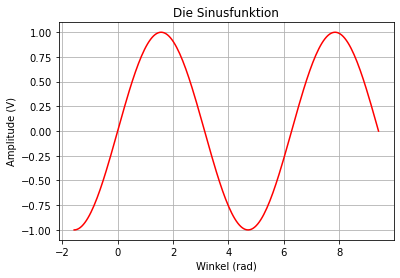

In [14]:
import matplotlib.pyplot as plt

x = np.linspace(-np.pi/2, 3*np.pi, 200)
y = np.sin(x)

plt.plot(x, y, '-r')
plt.grid()
plt.title('Die Sinusfunktion')
plt.xlabel('Winkel (rad)')
plt.ylabel('Amplitude (V)')
plt.show()

Auch mehrere Plots können in ein Fenster geplottet werden. Über den Parameter `label` können Labels für eine Legende übergeben werden:

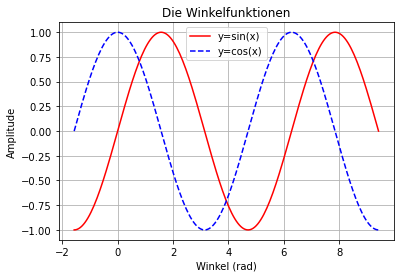

In [15]:
import matplotlib.pyplot as plt

x = np.linspace(-np.pi/2, 3*np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, '-r', label="y=sin(x)")
plt.plot(x, y2, '--b', label="y=cos(x)")

plt.grid()
plt.title('Die Winkelfunktionen')
plt.xlabel('Winkel (rad)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Die Pandas Bibliothek bietet Matplotlib-Befehle als Methoden für DataFrames und Series Objekte. In anderen Worten, ein Data Frame kann Plot-Befehle aufrufen und auf eigene Datenfelder (Spalten) als Input verweisen. Wir erzeugen einen DataFrame aus den Sinus-Daten.

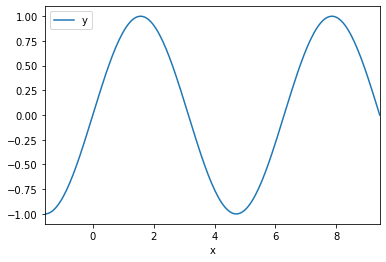

In [16]:
df = pd.DataFrame({'x': x, 'y': y1})
df.plot('x', 'y')
plt.show()

### Seaborn

Seaborn ist eine Bibliothek, die auf Matplotlib aufbaut und in wenigen Zeilen Code sehr ansprechende, publikationsfertige Grafiken erzeugen kann. Die Farbpaletten und der Plotstil von Seaborn wirken sehr modern; man sollte jedoch eine Ahnung von Matplotlib habe, wenn man Seaborn verwendet. Die Online Doku von Seaborn ist schlank und gut strukturiert

https://seaborn.pydata.org/

Die Doku verweist auf die Version 0.9.0 während auf den Klassenzimmer PCs die Version 0.7.1 installiert ist. Da Seaborn ein sehr neues Paket ist, sind die Versionssprünge sehr gross und mancher Befehl in der alten Version steht vielleicht nicht mehr zur Verfügung und umgekehrt. Hier muss man sich in Geduld üben: die Python und all seine Pakete sind **frei** und **open-source** und in einer rasanten Entwicklung begriffen - das darf man nicht vergessen! 

Zusammengefasst kann man sagen, dass Seaborn mehr vorgefertigte Plots anbietet, die man als Data Scientist benötigt während Matplotlib eine *general purpose* Plot-Bibliothek ist.  

In [17]:
import seaborn as sns
sns.__version__

'0.11.1'

Seaborn ist speziell auch in der Lage mit DataFrames umzugehen. 

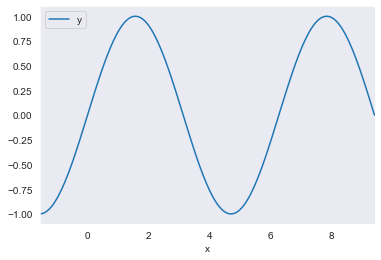

In [18]:
#Seaborn hat vorgefertigte Stile: Versuchen Sie einmal 'whitegrid' oder 'ticks'
sns.set_style("dark")

# normale Matplotlib Befehle übernehmen den Seaborn Stil. 
df.plot('x', 'y')
plt.show()

Im Laufe dieser Vorlesung werden wir beide Ansätze -Matplotlib und Seaborn- verwenden und vergleichen. Es gibt noch eine handvoll weiterer Visualisierungs-Tools in Python. Erwähnen wollen wir hier noch *Bokeh*, ein Paket, das **interaktive** Visualisierungen für Web-Browser erstellt. 

http://bokeh.pydata.org/en/latest/

Wir gehen hier nicht näher darauf ein, aber Interaktion ist ein wichtiger Aspekt jeder EDA. Diese Beispiele zeigt dies sehr schön

https://demo.bokehplots.com/apps/movies
https://demo.bokehplots.com/apps/selection_histogram

## Univariate EDA

Wir kehren nun zu unserem *Titanic*-Daten zurück und verfolgen die Inhalte der Vorlesung interaktiv mit. Wir beginnen mit **univariater** EDA, d.h. wir betrachten die einzelnen Merkmale für sich. Bei qualitativen Merkmalen bleibt nicht viel anderes übrige, als Häufgkeiten zur studieren. Dafür gibt es den Befehl `value_counts`.

1    216
2    184
3    491
Name: Pclass, dtype: int64


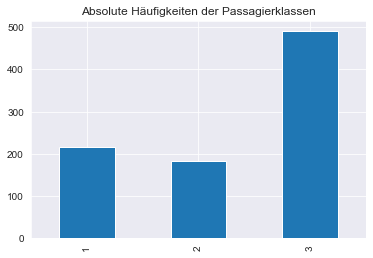

In [19]:
#frequency table 
print(titanic_data['Pclass'].value_counts(sort=False))

# bar plot of passenger classes (absolute) 
titanic_data['Pclass'].value_counts(sort=False).plot(kind='bar') 
plt.grid() 
plt.title('Absolute Häufigkeiten der Passagierklassen')
plt.show()

Der Boole'sche Parameter `normalized` definiert, ob die Häufigkeiten relativ (`True`) oder absolut (`False` default) berechnet werden. 

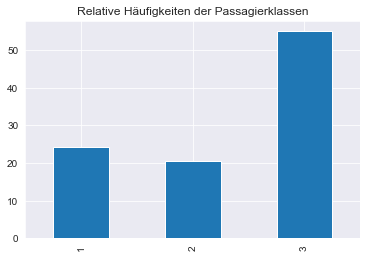

In [20]:
#frequency table (in %) 
100*titanic_data['Pclass'].value_counts(sort=False, normalize=True)

# bar plot of passenger classes (absolute) 
freq = 100*titanic_data['Pclass'].value_counts(sort=False, normalize=True)
freq.plot(kind='bar') 
plt.grid() 
plt.title('Relative Häufigkeiten der Passagierklassen')
plt.show()

Wir vergleichen hier auch die Lösungen von Matplotlib und Seaborn. Folgende Code-Zeile erzeugt ein Balkendiagram mit Seaborn. Wir werden weiter unten sehen, dass insbesondere die Kombination mit anderen Merkmalen sehr einfach mit Seaborn bewerkstelligt werden kann. 

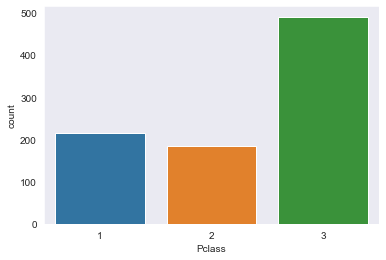

In [21]:
sns.countplot(x='Pclass', data = titanic_data)
plt.show()

Häufigkeiten werden oft auch mittels eines Pie-Charts dargestellt. Hier gilt wie immer *weniger ist mehr*: es sollte auf 3D Effekte und Perspektive verzichtet werden. 

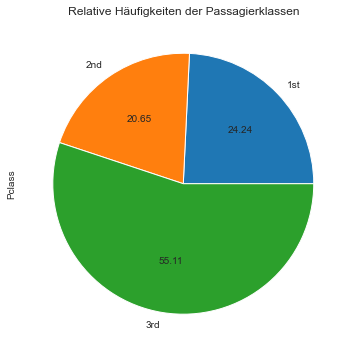

In [22]:
#frequency table (%) 
100*titanic_data['Pclass'].value_counts(sort=False, normalize=True)

# pie chart of passenger classes 
freq = 100*titanic_data['Pclass'].value_counts(sort=False, normalize=True) 
freq.plot(kind='pie', labels = ['1st', '2nd', '3rd'], figsize=(6, 6), autopct='%.2f') 
plt.title('Relative Häufigkeiten der Passagierklassen')
plt.show()

Für quantitative univariate Daten eignen sich vor allem Histogramme und Boxplots für die Visualisierung der Daten. Masszahlen können mit Pandas einfach über den `describe` Befehl erstellt werden. Jedoch können auch einzelne Werte berechnet werden.  

In [23]:
#Zusammenfassung
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
# 20% Quantil
titanic_data['Fare'].quantile(0.2)

7.8542

Die Zusammenfassung von `describe` hängt vom Datentyp ab:

In [25]:
#Zusammenfassung nominaler Variablen (überladen)
titanic_data['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

Hierzu eine wichtige Bemerkung: Das Merkmal `Survived` ist eine *Boole'sche* Variable, die ein binäres Merkmal (wahr/falsch) beschreibt. Die Variable wird mit den Integerwerten `0` und `1` kodiert, was zunächst willkürlich erscheint. Pandas wird diesen Datentyp auch zunächst als ganze Zahl behandeln und erlaubt somit auch Summation, Mittelwertbildung, etc. Dies macht Sinn, wenn man das Merkmal als Realisierung einer *Bernoulli* Zufallsvariablen betrachtet. Führt man z.B. den `mean` Befehl erhält man den Prozentsatz der Überlebenden. 

In [26]:
titanic_data['Survived'].mean()

0.3838383838383838

Herkömmliche Histogramme können mit dem `hist` Befehl erstellt werden. Der Parameter `normed=True` erstellt ein relatives Histogramm, bei dem sich die Fläche zu eins aufsummiert. 

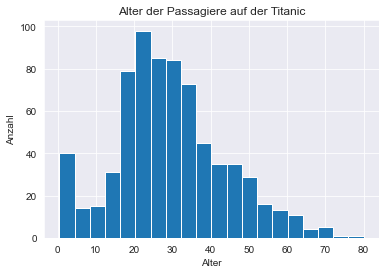

In [27]:
# Histogramm des Alters
titanic_data['Age'].hist(bins=20)#, normed=True) 
plt.title('Alter der Passagiere auf der Titanic') 
plt.xlabel('Alter') 
plt.ylabel('Anzahl')
plt.show()

Irreguläre Bins haben ihre Daseinsberechtigung, nur muss darauf geachtet werden, dass dann **nur relative** Häufigkeiten verwendet werden dürfen. Was passiert, wenn `density=False` gesetzt wird?

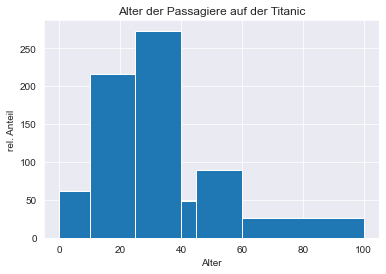

In [28]:
# Histogramm des Alters
bins = [0, 10, 25, 40, 45, 60, 100] 
titanic_data['Age'].hist(bins=bins, density=False) 
plt.title('Alter der Passagiere auf der Titanic') 
plt.xlabel('Alter') 
plt.ylabel('rel. Anteil')
plt.show()

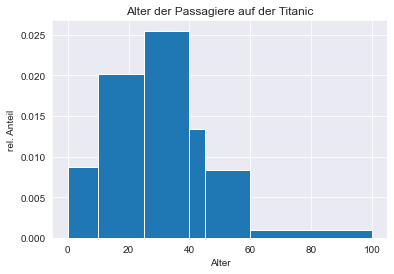

In [29]:
# Histogramm des Alters
bins = [0, 10, 25, 40, 45, 60, 100] 
titanic_data['Age'].hist(bins=bins, density=True) 
plt.title('Alter der Passagiere auf der Titanic') 
plt.xlabel('Alter') 
plt.ylabel('rel. Anteil')
plt.show()

Seaborn bietet natürlich auch eine Histogramm-Routine, die mit allerlei möglichen Erweiterungsmöglichkeiten aufwartet:
- Rug-Plot (Teppich): Die Rohdaten werden auf der x-Achse als kleine Markierungen eingezeichnet. 
- KDE (kernel density estimator): Ein Dichteschätzer der zugrundeliegenden Verteilung wird eingezeichnet.

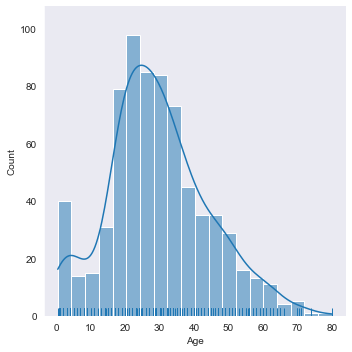

In [34]:
sns.displot(x=titanic_data['Age'].dropna(), bins=20, kde=True, rug=True)
plt.show()

Besonders gelungen ist die Realisierung des Boxplots mit Seaborn v.a. wenn man den Plot mit einem `swarmplot` kombiniert. 

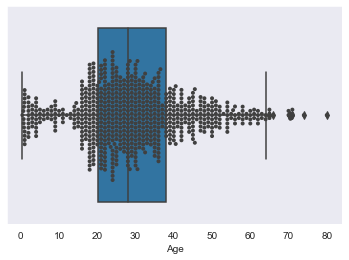

In [55]:
sns.boxplot(x="Age", data = titanic_data)
sns.swarmplot(x="Age", data = titanic_data, color="0.25", size=4)
plt.show()

Generell ist zu bemerken, dass `swarmplot` oder `rugplot` spannende Techniken sind, da sie einen Blick auf die Rohdaten gewähren. Folgendes kleine Beispiel (mit synthetischen Daten) soll dies zeigen. Die Rohdaten sind klar in zwei Gruppen aufgeteilt (*cluster*), aber der Boxplot ist zu stark vereinfachend, sodass diese Information verloren geht. Der `swarmplot` zeigt die Gruppen jedoch sehr deutlich.

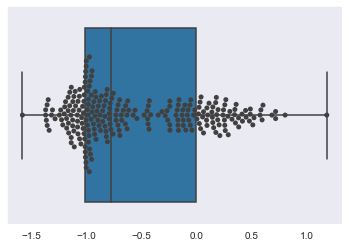

In [37]:
x1 = np.random.normal(loc=-1, scale=0.2, size=150)
x2 = np.random.normal(loc=0.1, scale=0.3, size=100)
x = np.append(x1, x2, axis=0)

sns.boxplot(x=x)
sns.swarmplot(x=x, color="0.25")
plt.show()

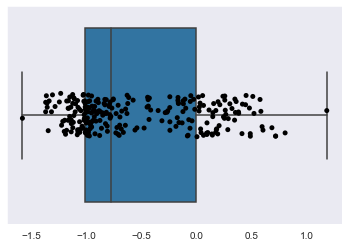

In [38]:
sns.boxplot(x=x)
sns.stripplot(x=x, jitter=True, color='k')
plt.show()

## Multivariate EDA

Bei der multivariaten EDA gibt es zahlreiche Möglichkeiten, wie das Zusammenspiel einzelner Merkmale in einer Datenmatrix analysiert werden kann. Wir präsentieren hier eine Auswahl der wichtigsten Techniken und Methoden zur Darstellung von Daten. 

### Qualitative Merkmale

Qualitative Merkmale dienen oft als Kriterien für Gruppierungen. Wir studieren hier alle möglichen Methoden der multivariaten EDA, bei der mindestens eine der Variablen qualitative ist. 

Die **Kreuztabelle** (oder **Kontingenztafel**) ist dabei der Klassiker unter den Methoden. Hier werden die Ausprägungen zweier qualitativer Merkmale *kreuzweise* kombiniert und die Anzahl der Messdaten mit der jeweiligen Merkmalskombination angegeben. 

In [39]:
pd.crosstab(index = titanic_data['Pclass'], columns=titanic_data['Survived'], margins=True) 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Mit Seaborn können Kreuztabellen als **Heatmap** dargestellt werden. Das macht vor allem dann Sinn, wenn eines (oder beide) der Merkmale sehr viele (diskrete) Ausprägungen hat. 

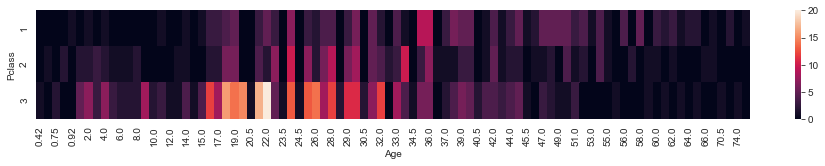

In [40]:
tab = pd.crosstab(index = titanic_data['Pclass'], columns=titanic_data['Age'])

plt.figure(figsize=(16, 2))
sns.heatmap(tab)
plt.show()

Statt der Anzahl der Elemente in den jeweiligen Kategorien, kann natürlich auch ein aggregierter Wert eines weiteren Merkmals angegeben werden. Man spricht dann von einer **Pivot-Tabelle**. Auch diese kann mit einer Heatmap dargestellt werden.

In [41]:
titanic_data.pivot_table(index='Pclass', columns='Sex', values='Age', aggfunc='median')
#titanic_data.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,35.0,40.0
2,28.0,30.0
3,21.5,25.0


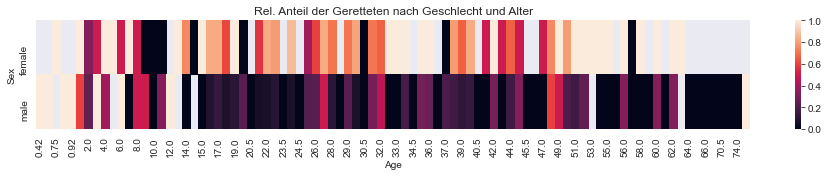

In [42]:
plt.figure(figsize=(16, 2))
sns.heatmap(titanic_data.pivot_table(index='Sex', columns='Age', values='Survived', aggfunc='mean'))
plt.title('Rel. Anteil der Geretteten nach Geschlecht und Alter')
plt.show()

Ein weiteres sehr beliebtes Werkzeug, um quantitative Werte in verschiedenen Gruppen zu analysieren sind **gruppierte Boxplots**. In der grundlegenden Matplotlib Variante sieht dies so aus

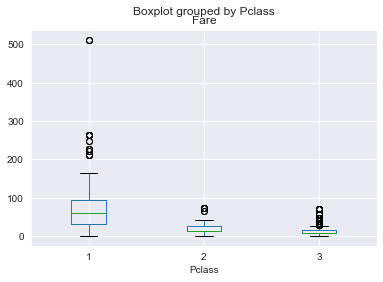

In [43]:
titanic_data.boxplot(column='Fare', by='Pclass') 
plt.show()

An dieser Stelle kommt aber die API von Seaborn zum Zug. Die Bibliothek hat eine eigene Sparte von Plots dieser Bauart auf Lager, die unter dem Familiennamen *Categorical plots* laufen. Hier einige Beispiele:

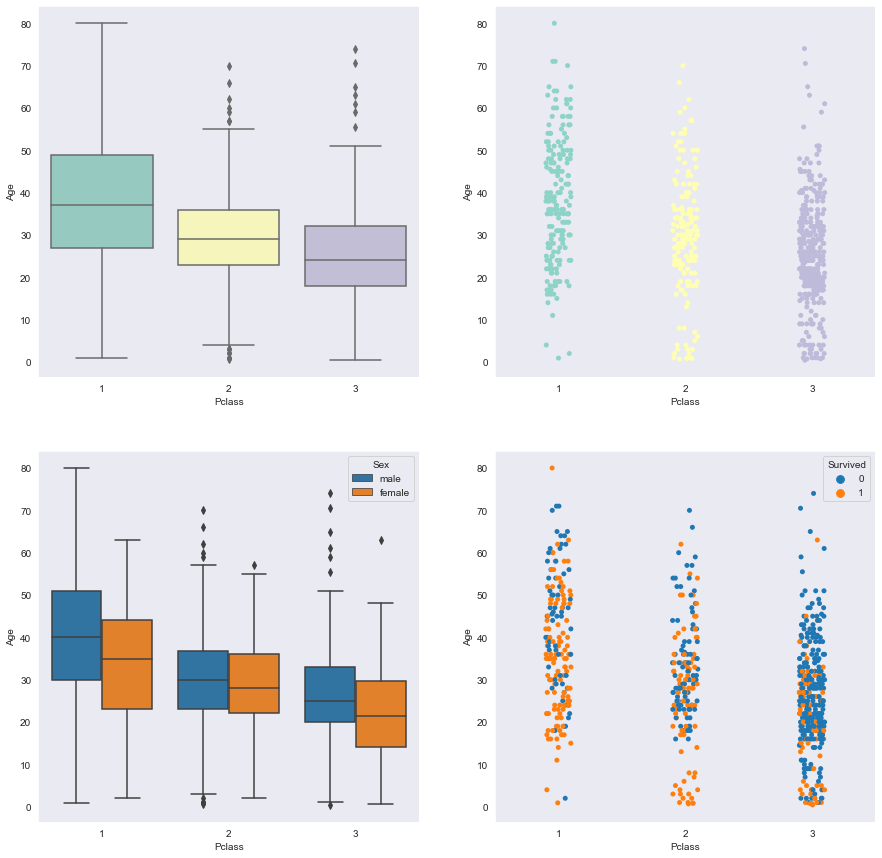

In [44]:
f, ax = plt.subplots(2,2)
f.set_size_inches(15, 15)

sns.boxplot(x="Pclass", y="Age", data=titanic_data, palette="Set3", ax = ax[0,0])
sns.stripplot(x="Pclass", y="Age", data=titanic_data, palette="Set3", jitter = True, ax = ax[0,1])

sns.boxplot(x="Pclass", y="Age", hue = "Sex", data=titanic_data,  ax = ax[1,0])
sns.stripplot(x="Pclass", y="Age", hue = "Survived", data=titanic_data, jitter = True, ax = ax[1,1])

plt.show()

## Quantitative Daten

Werden vornehmlich quantitative Merkmale verglichen, bieten sich meist **Streudiagramme** (**scatter-plots**) an. Dies entspricht dem Standardplot in Matplotlib.  

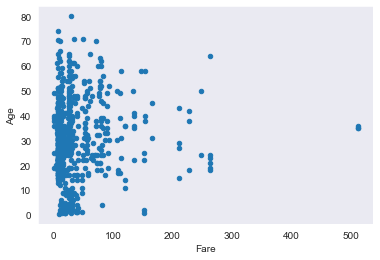

In [45]:
titanic_data.plot(x='Fare', y='Age', kind='scatter') 
plt.show()

Qualitative Merkmale können über Farben kodiert werden und weitere quantitative Merkmale über die Grösse der verwendeten Symbole. Dies geht mit dem Seaborn Paket sehr leicht. Ab Version 0.9.0 gibt es eigene `scatterplot` Funktionen. Man kann aber auch die ältere Methode `lmplot` verwenden oder das Tool `joinplot`, das auch über eine Fülle von Parametern verfügt. 

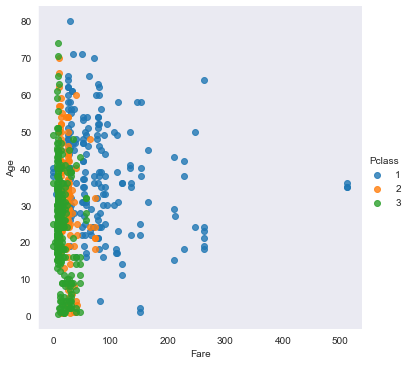

In [46]:
import seaborn as sns 
sns.lmplot(x='Fare', y='Age', data = titanic_data, hue='Pclass', fit_reg=False)
plt.show()

Seaborn ermöglicht es, mittels Parameter-Dictionaries (`???_kws` ... keywords) die Ästhetik eines Plots zu verändern. Wir geben hier ein Beispiel, wie die Transparenz der Plot-Symbole verändert werden kann.

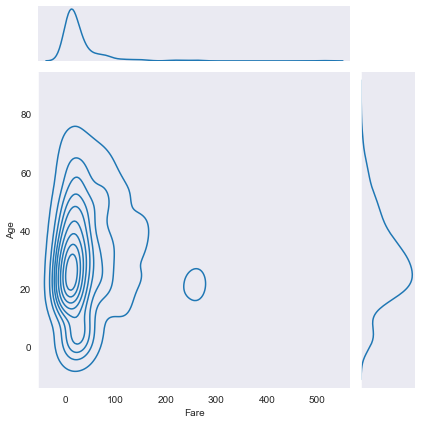

In [47]:
sns.jointplot(x='Fare', y='Age', data = titanic_data, kind='kde')
#ns.jointplot('Fare', 'Age', data = titanic_data, kind='hex')

#sns.jointplot('Fare', 'Age', data = titanic_data, 
#              joint_kws={'alpha': 0.1, 'color': 'darkred'}, # Parameter für den Joint Plot (Scatterplot)
#              marginal_kws={'bins': 50, 'color': 'darkred'}) # Parameter für die Histogramme an den Axen (marginal = Randverteilung)

#sns.jointplot('Fare', 'Age', data = titanic_data, joint_kws={'alpha':0.1}).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.show()

Um die Interpretierbarkeit der Darstellung zu erhöhen, lernen wir in der nächsten Lektion *Daten Transformationen* kennen. Wir machen hier bereits das erste Beispiel und transformieren die Variable `Fare` mittels des Logarithmus. Was fällt auf?

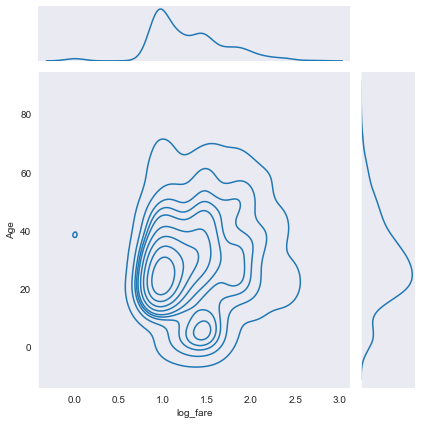

In [48]:
titanic_data['log_fare'] = np.log10(titanic_data['Fare']+1)
sns.jointplot(x='log_fare', y='Age', data = titanic_data, kind='kde')


## Fehlende Werte  (*missing values*)

In den meisten realen Datensätzen ist man mit der Situation konfrontiert, dass Werte in einer Datenmatrix fehlen. Das kann viele Gründe haben; beispielsweise kann ein Sensor ausfallen, bei der Signalübertragung können fehler auftreten und menschliches Versagen beim Messprozess ist generell nie auszuschliessen. 

Im *Titanic*-Datensatz sehen wir fehlende Werte beispielsweise in der Spalte `Cabin` mit der Kabinennummer. In Python wird der Platzhalter `NaN` verwendet. Mit dem Befahl `isnull()` können die Positionen der fehlenden Werte dann bestimmt werden. Mittels Aufsummieren können eine Statistik der fehlenden Werte über die Merkmale gemacht werden.

In [49]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
log_fare      0
dtype: int64

Wir sehen also. dass ein `Age` und `Cabin` viele Fehlende Werte aufweisen. Wie fehlende Werte ersetzt werden können und wann dies erlaubt ist, erfahren wir in der nächsten Lektion. Interessant ist stets, ob die fehlenden Werte in einer systematischen Art auftauchen, oder zufällig. Dabei kommt eines das **logische Indizieren** in Python/Pandas sehr entgegen:

In [50]:
titanic_data_1 = titanic_data[titanic_data.Cabin.isnull()]
print(titanic_data_1['Pclass'].value_counts(normalize=True))
print(titanic_data['Pclass'].value_counts(normalize=True))

3    0.697234
2    0.244541
1    0.058224
Name: Pclass, dtype: float64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
